In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Importar la regresión lineal
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Cargar conjuntos de características
X_train = pd.read_csv("Data/processedAca/X_train.csv")
X_test = pd.read_csv("Data/processedAca/X_test.csv")

# Cargar conjuntos de la variable objetivo
y_train = pd.read_csv("Data/processedAca/y_train.csv")
y_test = pd.read_csv("Data/processedAca/y_test.csv")

In [3]:
print("Conjunto de entrenamiento (X_train) dimensiones:", X_train.shape)
print("Conjunto de prueba (X_test) dimensiones:", X_test.shape)
print("Variable objetivo entrenamiento (y_train) dimensiones:", y_train.shape)
print("Variable objetivo prueba (y_test) dimensiones:", y_test.shape)

Conjunto de entrenamiento (X_train) dimensiones: (758, 16)
Conjunto de prueba (X_test) dimensiones: (190, 16)
Variable objetivo entrenamiento (y_train) dimensiones: (758, 1)
Variable objetivo prueba (y_test) dimensiones: (190, 1)


In [4]:
X_train.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,-1.698893,0.648468,1.624861,-1.639258,-0.332459,1.335052,1.352098,-2.090210,1.455967,0.743295,3,-0.209108,True,True,False,False
1,0.272414,-0.677216,0.136465,1.312192,-0.192966,-1.395960,1.527098,-1.370923,0.122330,1.839092,3,-0.790411,False,False,False,True
2,-1.123928,2.205322,0.841495,-0.076726,-1.657634,-1.532510,-0.631235,-0.427859,-0.211079,-0.352502,2,1.666984,True,False,False,False
3,0.354552,-0.247902,-1.586940,-0.597570,-0.471951,0.788850,0.477098,0.499221,-0.044375,0.743295,2,0.717672,False,False,False,True
4,-1.123928,1.469355,1.233178,-0.510763,0.853224,0.652299,0.243765,-0.571716,-0.544488,-0.352502,2,0.720677,True,False,False,False


In [5]:
y_train.head()

,Calories_Burned
0,1315.0
1,1129.0
2,686.0
3,875.0
4,1150.0


In [6]:
# Convertir columnas booleanas a enteros
bool_columns = ['Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']
X_train[bool_columns] = X_train[bool_columns].astype(int)
X_test[bool_columns] = X_test[bool_columns].astype(int)

In [7]:
# Inicializar el modelo de regresión lineal
regressor = LinearRegression()

# Ajustar el modelo de regresión lineal con los datos de entrenamiento
regressor.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [8]:
print(f'Pérdida (MSE) en el conjunto de prueba: {mse:.4f}')
print(f'Error Absoluto Medio (MAE) en el conjunto de prueba: {mae:.4f}')
print(f'Coeficiente de Determinación (R²) en el conjunto de prueba: {r2:.4f}')

Pérdida (MSE) en el conjunto de prueba: 1570.4539
Error Absoluto Medio (MAE) en el conjunto de prueba: 30.2850
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9801


In [9]:
comparison = pd.DataFrame({'Real': y_test.values.flatten(), 'Predicho': y_pred.flatten()})

# Mostrar las primeras 10 filas
print(comparison.head(10))

     Real     Predicho
0   354.0   281.977976
1   636.0   641.409146
2   678.0   632.156034
3  1688.0  1572.094533
4   962.0  1000.919072
5   695.0   726.413194
6   813.0   800.421805
7   804.0   805.278947
8   598.0   559.843159
9  1163.0  1224.155322


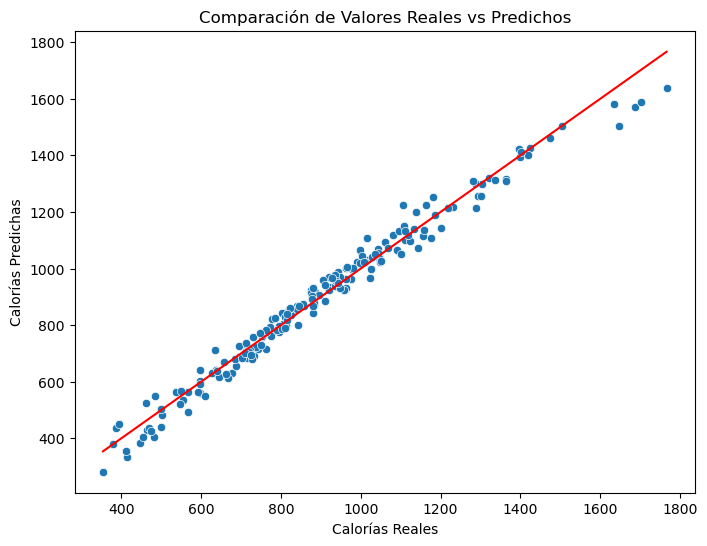

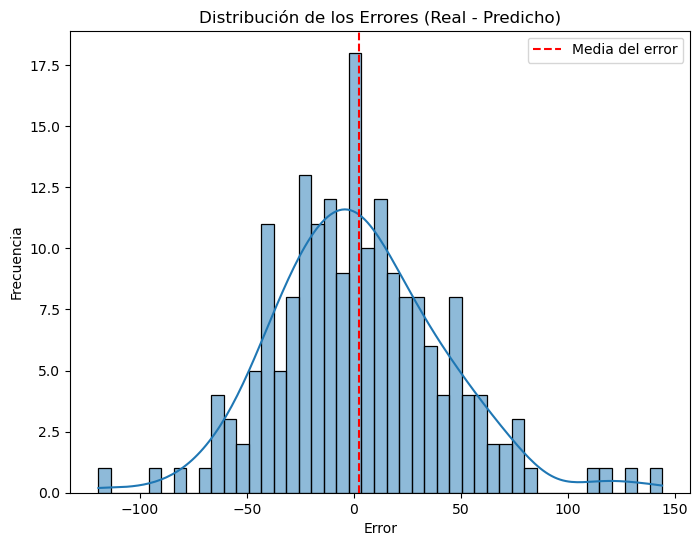

In [10]:
# Gráfico de dispersión Real vs Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Real', y='Predicho', data=comparison)
plt.title('Comparación de Valores Reales vs Predichos')
plt.xlabel('Calorías Reales')
plt.ylabel('Calorías Predichas')
plt.plot([comparison['Real'].min(), comparison['Real'].max()], 
         [comparison['Real'].min(), comparison['Real'].max()], 
         color='red')  # Línea de referencia
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(comparison['Real'] - comparison['Predicho'], bins=45, kde=True)
plt.axvline((comparison['Real'] - comparison['Predicho']).mean(), color='red', linestyle='--', label='Media del error')
plt.title('Distribución de los Errores (Real - Predicho)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


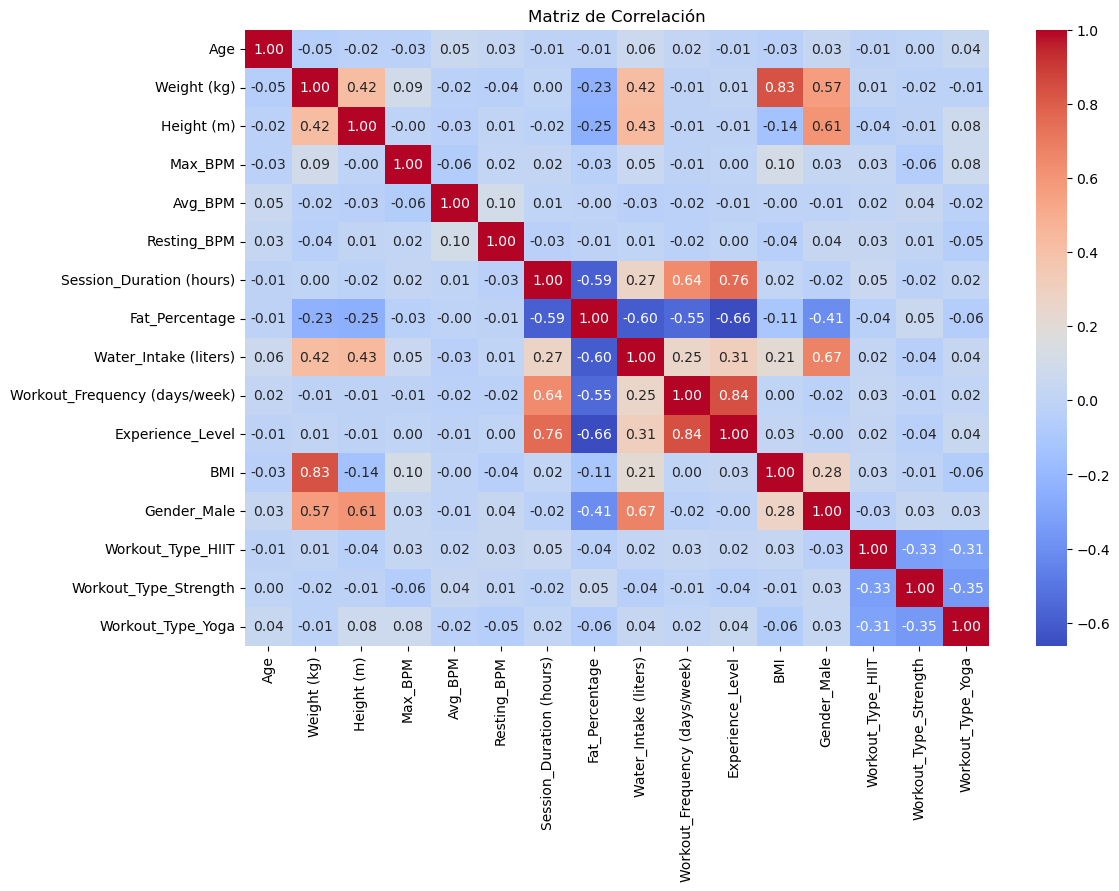

In [11]:
# Generar la matriz de correlación
correlation_matrix = X_train.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [12]:
# Asegúrate de usar solo variables numéricas
X_train_num = X_train.select_dtypes(include=['number'])

# Calcular VIF
vif = pd.DataFrame()
vif["Variable"] = X_train_num.columns
vif["VIF"] = [variance_inflation_factor(X_train_num.values, i) 
              for i in range(X_train_num.shape[1])]

# Mostrar el resultado
print(vif.sort_values(by="VIF", ascending=False))


                         Variable        VIF
1                     Weight (kg)  74.340079
11                            BMI  64.181172
2                      Height (m)  24.761929
10               Experience_Level   6.270173
12                    Gender_Male   5.591434
7                  Fat_Percentage   2.542307
8           Water_Intake (liters)   2.427180
9   Workout_Frequency (days/week)   2.305818
6        Session_Duration (hours)   2.275294
14          Workout_Type_Strength   1.982669
15              Workout_Type_Yoga   1.923863
13              Workout_Type_HIIT   1.762436
0                             Age   1.030855
3                         Max_BPM   1.029071
4                         Avg_BPM   1.023224
5                     Resting_BPM   1.020724


In [13]:
columns_to_drop = ['BMI', 'Experience_Level']

for col in columns_to_drop:
    if col in X_train.columns:
        X_train = X_train.drop(columns=columns_to_drop)
        X_test = X_test.drop(columns=columns_to_drop)
    else:
        print(f"La columna {col} no existe en los datos.")

La columna Experience_Level no existe en los datos.


In [14]:
# Inicializar el modelo de regresión lineal
regressor = LinearRegression()

# Ajustar el modelo de regresión lineal con los datos de entrenamiento
regressor.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f'Pérdida (MSE) en el conjunto de prueba: {mse:.4f}')
print(f'Error Absoluto Medio (MAE) en el conjunto de prueba: {mae:.4f}')
print(f'Coeficiente de Determinación (R²) en el conjunto de prueba: {r2:.4f}')

Pérdida (MSE) en el conjunto de prueba: 1593.6277
Error Absoluto Medio (MAE) en el conjunto de prueba: 30.3428
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9798


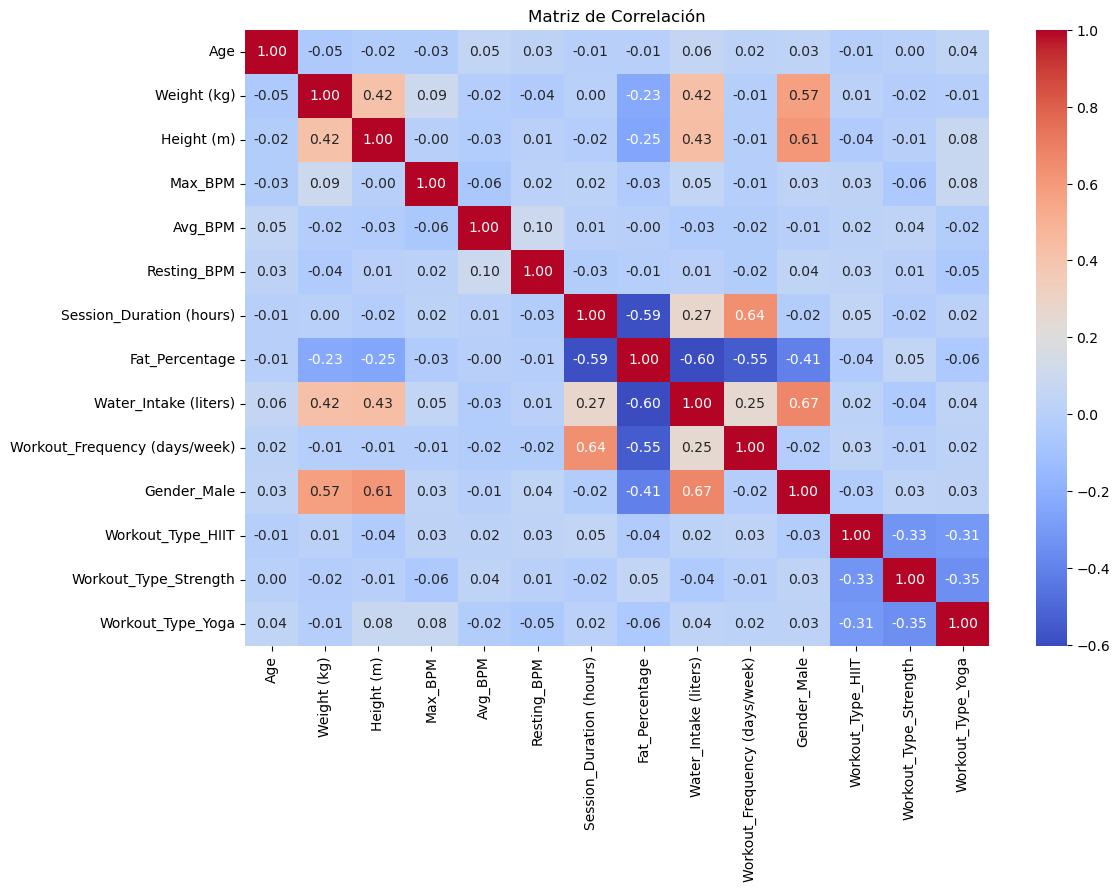

In [16]:
# Generar la matriz de correlación
correlation_matrix = X_train.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [17]:
# Asegúrate de usar solo variables numéricas
X_train_num = X_train.select_dtypes(include=['number'])

# Calcular VIF
vif = pd.DataFrame()
vif["Variable"] = X_train_num.columns
vif["VIF"] = [variance_inflation_factor(X_train_num.values, i) 
              for i in range(X_train_num.shape[1])]

# Mostrar el resultado
print(vif.sort_values(by="VIF", ascending=False))

                         Variable       VIF
10                    Gender_Male  3.501738
7                  Fat_Percentage  2.542070
8           Water_Intake (liters)  2.257845
6        Session_Duration (hours)  2.086206
9   Workout_Frequency (days/week)  1.900971
12          Workout_Type_Strength  1.625853
2                      Height (m)  1.508541
13              Workout_Type_Yoga  1.484070
1                     Weight (kg)  1.469451
11              Workout_Type_HIIT  1.387869
3                         Max_BPM  1.027627
4                         Avg_BPM  1.021705
5                     Resting_BPM  1.020557
0                             Age  1.019893


In [18]:
# Comparar los valores reales y predichos
comparison = pd.DataFrame({'Real': y_test.values.flatten(), 'Predicho': y_pred.flatten()})
print(comparison.head(10))

     Real     Predicho
0   354.0   280.756930
1   636.0   641.059924
2   678.0   633.943793
3  1688.0  1569.259889
4   962.0  1003.547252
5   695.0   725.872643
6   813.0   799.861574
7   804.0   803.753327
8   598.0   559.286844
9  1163.0  1225.309401


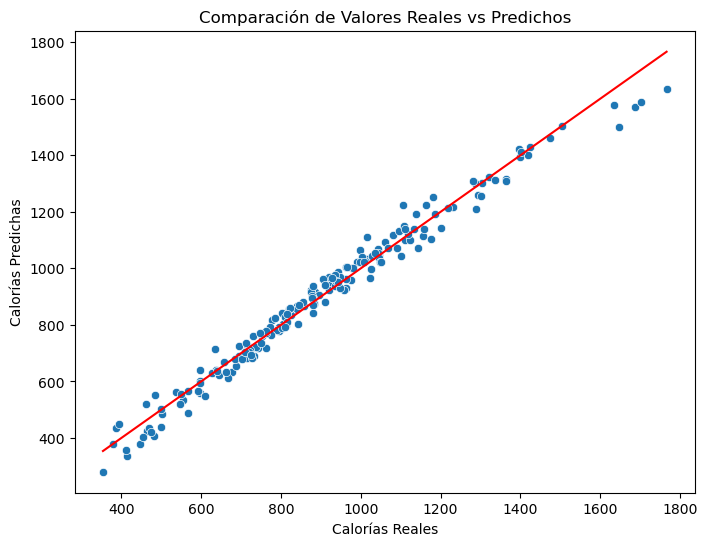

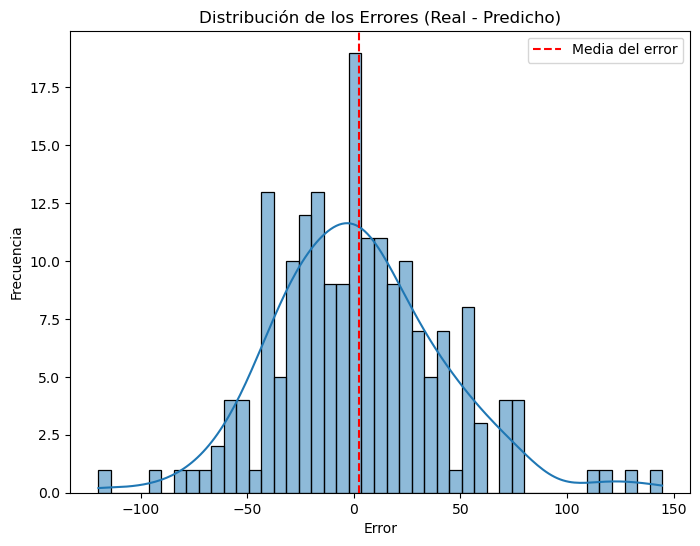

In [19]:
# Gráfico de dispersión Real vs Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Real', y='Predicho', data=comparison)
plt.title('Comparación de Valores Reales vs Predichos')
plt.xlabel('Calorías Reales')
plt.ylabel('Calorías Predichas')
plt.plot([comparison['Real'].min(), comparison['Real'].max()], 
         [comparison['Real'].min(), comparison['Real'].max()], 
         color='red')  # Línea de referencia
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(comparison['Real'] - comparison['Predicho'], bins=45, kde=True)
plt.axvline((comparison['Real'] - comparison['Predicho']).mean(), color='red', linestyle='--', label='Media del error')
plt.title('Distribución de los Errores (Real - Predicho)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()